# Loan Prediction - 01 - Exploratory Data Analysis and Pre-cleaning

The purpose of this initial analysis is to get insights of the current dataset its variables.

In [1]:
import sys
sys.path.append('utils')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

plt.style.use('seaborn')

import dataframe_utils
import preprocess_utils

### Importing and pre-visualization

In [2]:
df_covid = pd.read_excel('datasets/dataset.xlsx').drop(labels = ['Patient ID'],axis=1)
df_covid

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for missing values

In [3]:
df_counts = df_covid.count()
display(df_counts.head(59))

Patient age quantile                                     5644
SARS-Cov-2 exam result                                   5644
Patient addmited to regular ward (1=yes, 0=no)           5644
Patient addmited to semi-intensive unit (1=yes, 0=no)    5644
Patient addmited to intensive care unit (1=yes, 0=no)    5644
Hematocrit                                                603
Hemoglobin                                                603
Platelets                                                 602
Mean platelet volume                                      599
Red blood Cells                                           602
Lymphocytes                                               602
Mean corpuscular hemoglobin concentration (MCHC)          602
Leukocytes                                                602
Basophils                                                 602
Mean corpuscular hemoglobin (MCH)                         602
Eosinophils                                               602
Mean cor

In [4]:
display(df_counts.tail(52))

Base excess (venous blood gas analysis)      136
pO2 (venous blood gas analysis)              136
Fio2 (venous blood gas analysis)               1
Total CO2 (venous blood gas analysis)        136
pH (venous blood gas analysis)               136
HCO3 (venous blood gas analysis)             136
Rods #                                        97
Segmented                                     97
Promyelocytes                                 97
Metamyelocytes                                97
Myelocytes                                    97
Myeloblasts                                   97
Urine - Esterase                              60
Urine - Aspect                                70
Urine - pH                                    70
Urine - Hemoglobin                            70
Urine - Bile pigments                         70
Urine - Ketone Bodies                         57
Urine - Nitrite                                1
Urine - Density                               70
Urine - Urobilinogen

### Drop columns with less than 500 registers

In [5]:
non_na_count = 500
mask_cols_to_drop = df_counts >= non_na_count
mask_cols_to_drop = mask_cols_to_drop[mask_cols_to_drop == True] 

In [6]:
selected_columns = list(mask_cols_to_drop.index)
df_covid_subset = df_covid[selected_columns]
df_covid_subset.shape

(5644, 40)

In [7]:
def count_rows_with_more_features(df,min_features = 1,max_features = 5):
    max_cols = df.shape[1]
    for count in range(min_features,max_features+1):
        rows_more_than = df.count(axis = 1) >= count
        count_complete = rows_more_than.sum()
        print(f'Rows containing at least {count} of {max_cols} features:', count_complete)
        
def select_rows_with_more_features(df,number):
    return df[df.count(axis = 1) >= number]

In [8]:
count_rows_with_more_features(df_covid_subset,min_features = 5,max_features = 39)

Rows containing at least 5 of 40 features: 5644
Rows containing at least 6 of 40 features: 2049
Rows containing at least 7 of 40 features: 2048
Rows containing at least 8 of 40 features: 1592
Rows containing at least 9 of 40 features: 1589
Rows containing at least 10 of 40 features: 1589
Rows containing at least 11 of 40 features: 1588
Rows containing at least 12 of 40 features: 1588
Rows containing at least 13 of 40 features: 1588
Rows containing at least 14 of 40 features: 1588
Rows containing at least 15 of 40 features: 1588
Rows containing at least 16 of 40 features: 1588
Rows containing at least 17 of 40 features: 1588
Rows containing at least 18 of 40 features: 1588
Rows containing at least 19 of 40 features: 1588
Rows containing at least 20 of 40 features: 1585
Rows containing at least 21 of 40 features: 1530
Rows containing at least 22 of 40 features: 1448
Rows containing at least 23 of 40 features: 600
Rows containing at least 24 of 40 features: 532
Rows containing at least 25

In [39]:
min_number_features = 37
df_covid_cut = select_rows_with_more_features(df_covid_subset,min_number_features)
display(df_covid_subset.shape)
df_covid_cut.count()

(5644, 40)

Patient age quantile                                     361
SARS-Cov-2 exam result                                   361
Patient addmited to regular ward (1=yes, 0=no)           361
Patient addmited to semi-intensive unit (1=yes, 0=no)    361
Patient addmited to intensive care unit (1=yes, 0=no)    361
Hematocrit                                               361
Hemoglobin                                               361
Platelets                                                361
Mean platelet volume                                     359
Red blood Cells                                          361
Lymphocytes                                              361
Mean corpuscular hemoglobin concentration (MCHC)         361
Leukocytes                                               361
Basophils                                                361
Mean corpuscular hemoglobin (MCH)                        361
Eosinophils                                              361
Mean corpuscular volume 

In [40]:
df_covid_final_cut = df_covid_cut.drop(columns = ['Influenza A, rapid test','Influenza B, rapid test'])

In [41]:
df_covid_final_cut.dropna(inplace = True)
df_covid_final_cut.shape

(272, 38)

In [ ]:
def look_for_optimal_rows_and_columns(df,minimum_valid_row_values, minimum_valid_column_values,max_missing_per_row):
    
    df_opt_cols = remove_columns_with_low_values(df,minimum_valid_column_values)
    
def remove_columns_with_low_values(df,minimum_valid_column_values):
    display(df.count())
    mask_cols_to_keep = df.count() >= minimum_valid_column_values
    return df.loc[:,mask_cols_to_keep.values]

def remove_rows_with_low_values(df,minimum_valid_row_values):
    
    
    
    
def count_rows_with_more_features(df,min_features = 1,max_features = 5):
    max_cols = df.shape[1]
    for count in range(min_features,max_features+1):
        rows_more_than = df.count(axis = 1) >= count
        count_complete = rows_more_than.sum()
        print(f'Rows containing at least {count} of {max_cols} features:', count_complete)
        
def select_rows_with_more_features(df,number):
    return df[df.count(axis = 1) >= number]

### Visualizing categorical data distribution

In [42]:
mask_non_numeric = df_covid_final_cut.dtypes == object
mask_non_numeric = mask_non_numeric[mask_non_numeric]
unique_values = dataframe_utils.show_column_options(df_covid_final_cut[mask_non_numeric.index])

Column Values:
SARS-Cov-2 exam result : ['negative' 'positive']
Respiratory Syncytial Virus : ['not_detected' 'detected']
Influenza A : ['not_detected' 'detected']
Influenza B : ['not_detected' 'detected']
Parainfluenza 1 : ['not_detected']
CoronavirusNL63 : ['not_detected' 'detected']
Rhinovirus/Enterovirus : ['detected' 'not_detected']
Coronavirus HKU1 : ['not_detected' 'detected']
Parainfluenza 3 : ['not_detected' 'detected']
Chlamydophila pneumoniae : ['not_detected']
Adenovirus : ['not_detected']
Parainfluenza 4 : ['not_detected' 'detected']
Coronavirus229E : ['not_detected' 'detected']
CoronavirusOC43 : ['not_detected' 'detected']
Inf A H1N1 2009 : ['not_detected' 'detected']
Bordetella pertussis : ['not_detected']
Metapneumovirus : ['not_detected' 'detected']
Parainfluenza 2 : ['not_detected']


In [43]:
irrelevant_columns = ['Bordetella pertussis','Parainfluenza 1','Parainfluenza 2','Adenovirus','Chlamydophila pneumoniae']
df_covid_final_cut.drop(columns = irrelevant_columns,inplace = True)
df_covid_final_cut.shape

(272, 33)

In [44]:
categorical_columns = np.setdiff1d(mask_non_numeric.index,irrelevant_columns)
categorical_columns = np.append(categorical_columns,['Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to regular ward (1=yes, 0=no)'])
categorical_columns = np.sort(categorical_columns)
numeric_columns = np.setdiff1d(df_covid_final_cut.columns,categorical_columns)
class_label = 'SARS-Cov-2 exam result'

In [45]:
def plot_binary_class_variable_distribution(df, columns, title, class_label, classes_values = [0,1], n_columns = 4, n_rows = 10,figsize=(20, 30)):

    fig, axes = plt.subplots(n_rows,n_columns,figsize=figsize)
    fig.suptitle(title,fontsize = 20)
    
    for index,col in enumerate(columns):

        keys = df[col].value_counts().keys()
        if n_rows == 1 or n_columns == 1:
            current_ax = axes[index]
        else:
            row_index = int(index / n_columns)
            col_index = int(index - n_columns * row_index)
            current_ax = axes[row_index][col_index]

        positive = df.copy()[df[class_label] == classes_values[0]][col]
        positive = positive.value_counts()
        negative = df.copy()[df[class_label] == classes_values[1]][col]
        negative = negative.value_counts()
        ax = pd.DataFrame({str(classes_values[0]): positive, str(classes_values[1]): negative}).plot(kind='bar', stacked=True,ax = current_ax)
        ax.set_xticklabels(keys)
        ax.set_title(col)
    plt.subplots_adjust(top=0.92, bottom=0, left=0.10, right=0.95, hspace=0.40,
                    wspace=0.35)
    plt.show()


def plot_numerical_distributions(df,columns,title, n_rows = 4, n_columns = 4, figure_size = (20, 12)):
    if (n_rows * n_columns) < len(columns):
        raise Exception('Dataset Variables to be shown must be the equal or smaller than the number of rows and columns.')
    fig, axes = plt.subplots(n_rows, n_columns, figsize = figure_size)
    fig.suptitle(title,fontsize = 20)
    
    for index,col in enumerate(columns):
        
        if n_rows == 1 or n_columns == 1:
            current_ax = axes[index]
        else:
            row_index = int(index/n_columns)
            col_index = int(index - n_columns*row_index)
            current_ax = axes[row_index][col_index]

        
        ax = sns.distplot(df[col], norm_hist=False,ax = current_ax,kde = False) 
        ax.set_title(col)
        label = r'$\mu={:2.2f},\ \sigma={:2.2f},\ median={:2.2f},\ mode={:2.2f}$'.format(df[col].mean(),df[col].std(),df[col].median(),df[col].mode().values[0])
        ax.set_xlabel(label)
    plt.subplots_adjust(top=0.92,hspace = 0.45,wspace = 0.5)    
    plt.show()
    
def plot_numerical_correlation(df,title,class_label):
    scatter_matrix = sns.pairplot(df,hue=class_label,height = 4);
    scatter_matrix.fig.suptitle('Correlation Between Numerical Variables',fontsize = 20);
    plt.subplots_adjust(top=0.95)

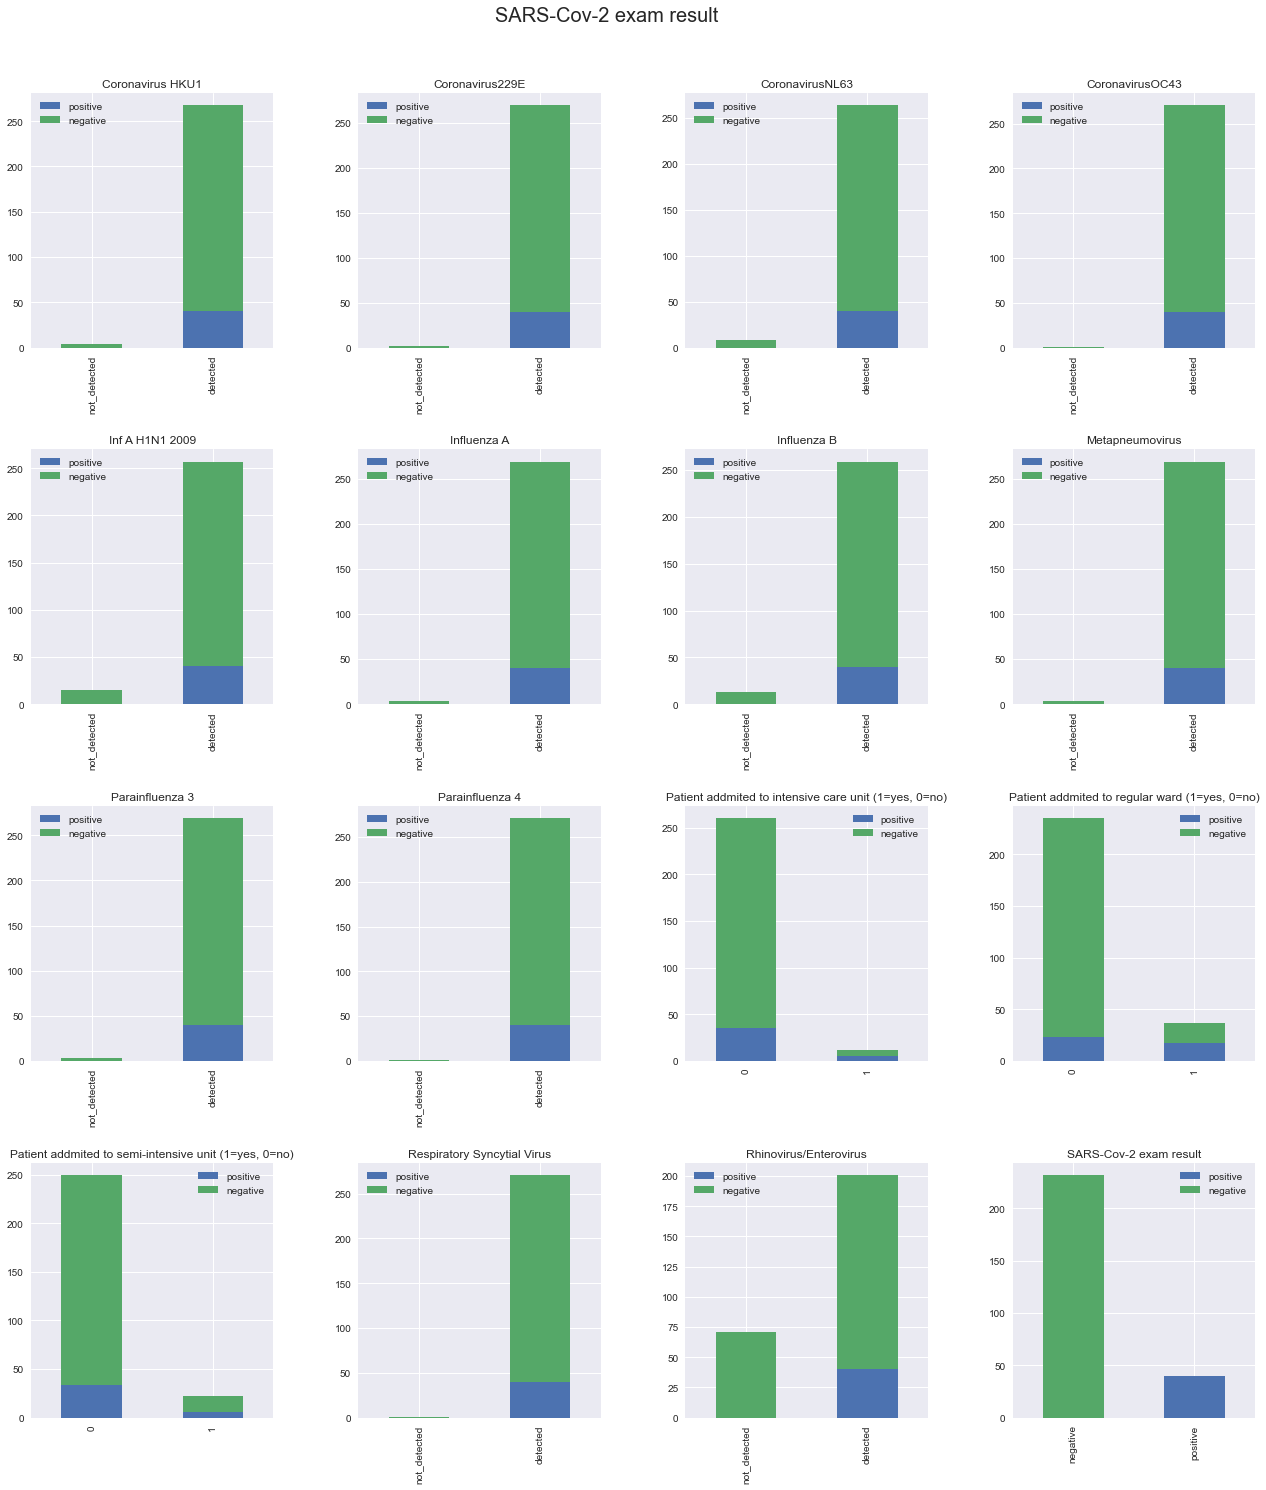

In [46]:
plot_binary_class_variable_distribution(df_covid_final_cut, columns = categorical_columns, class_label = class_label, title = class_label , classes_values = ['positive','negative'], n_columns = 4, n_rows = 4,figsize=(20, 20))

As we can see above, SARS-Cov-2 in an unbalanced class

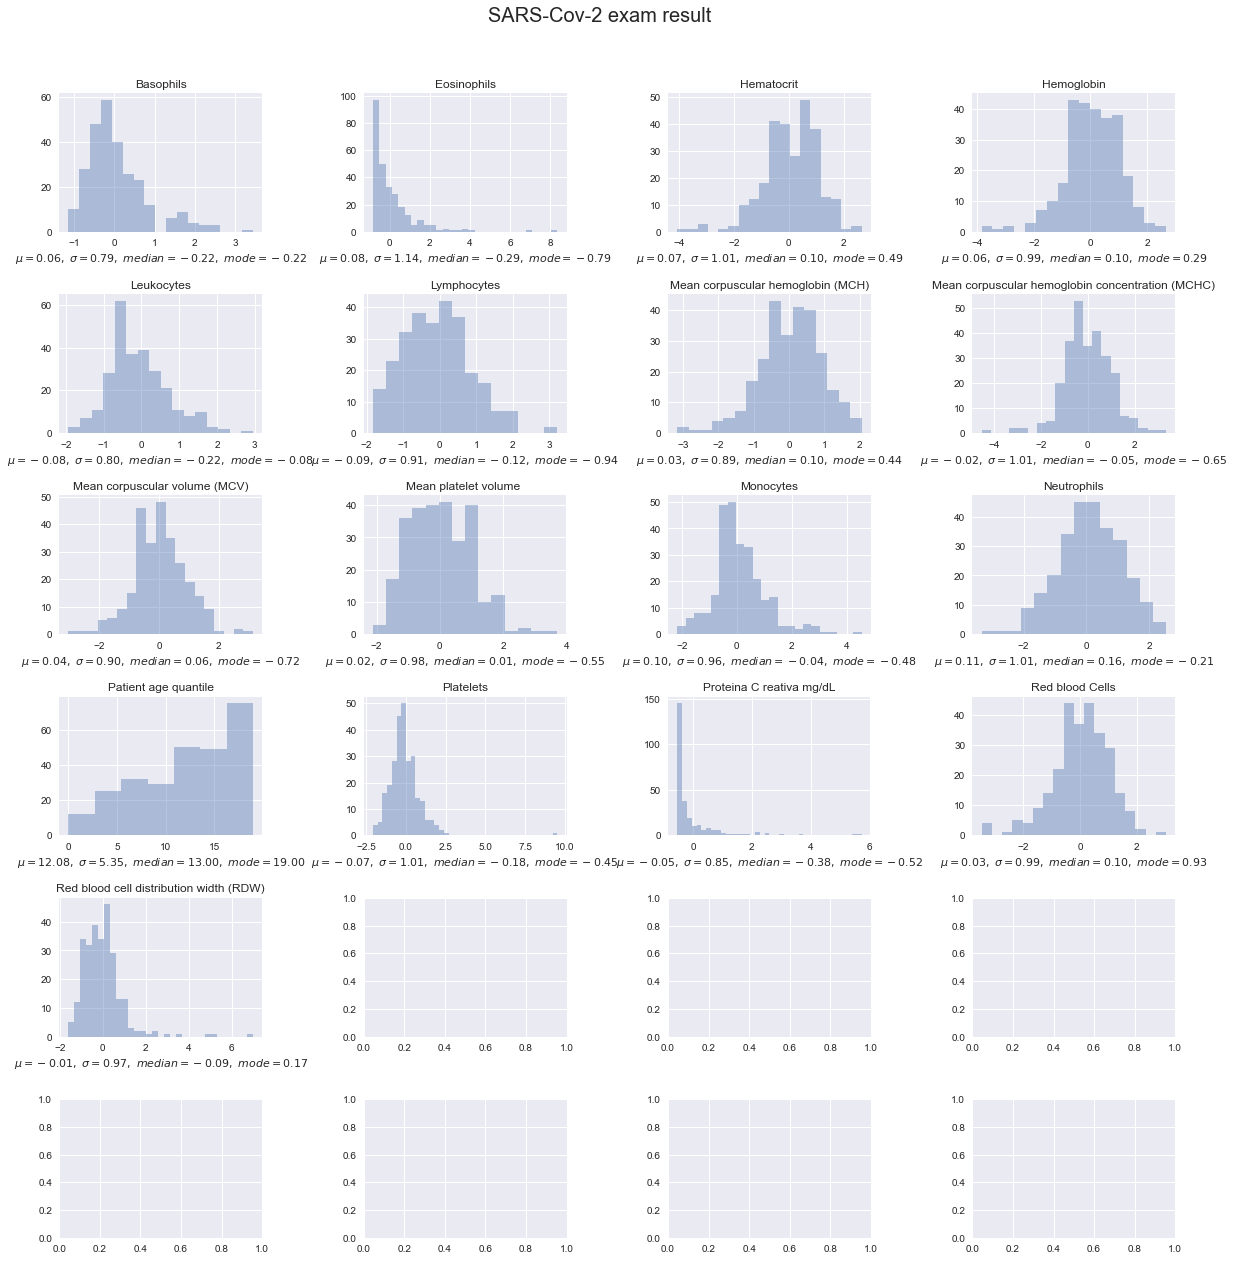

In [47]:
plot_numerical_distributions(df_covid_final_cut,columns = numeric_columns,title = class_label, n_columns = 4, n_rows = 6, figure_size = (20, 20))

In [48]:
numeric_columns

array(['Basophils', 'Eosinophils', 'Hematocrit', 'Hemoglobin',
       'Leukocytes', 'Lymphocytes', 'Mean corpuscular hemoglobin (MCH)',
       'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
       'Mean corpuscular volume (MCV)', 'Mean platelet volume ',
       'Monocytes', 'Neutrophils', 'Patient age quantile', 'Platelets',
       'Proteina C reativa mg/dL', 'Red blood Cells',
       'Red blood cell distribution width (RDW)'], dtype=object)

In [49]:
def plot_numerical_correlation(df,title,class_label):
    scatter_matrix = sns.pairplot(df,hue=class_label,height = 4);
    scatter_matrix.fig.suptitle('Correlation Between Numerical Variables',fontsize = 20);
    plt.subplots_adjust(top=0.95)

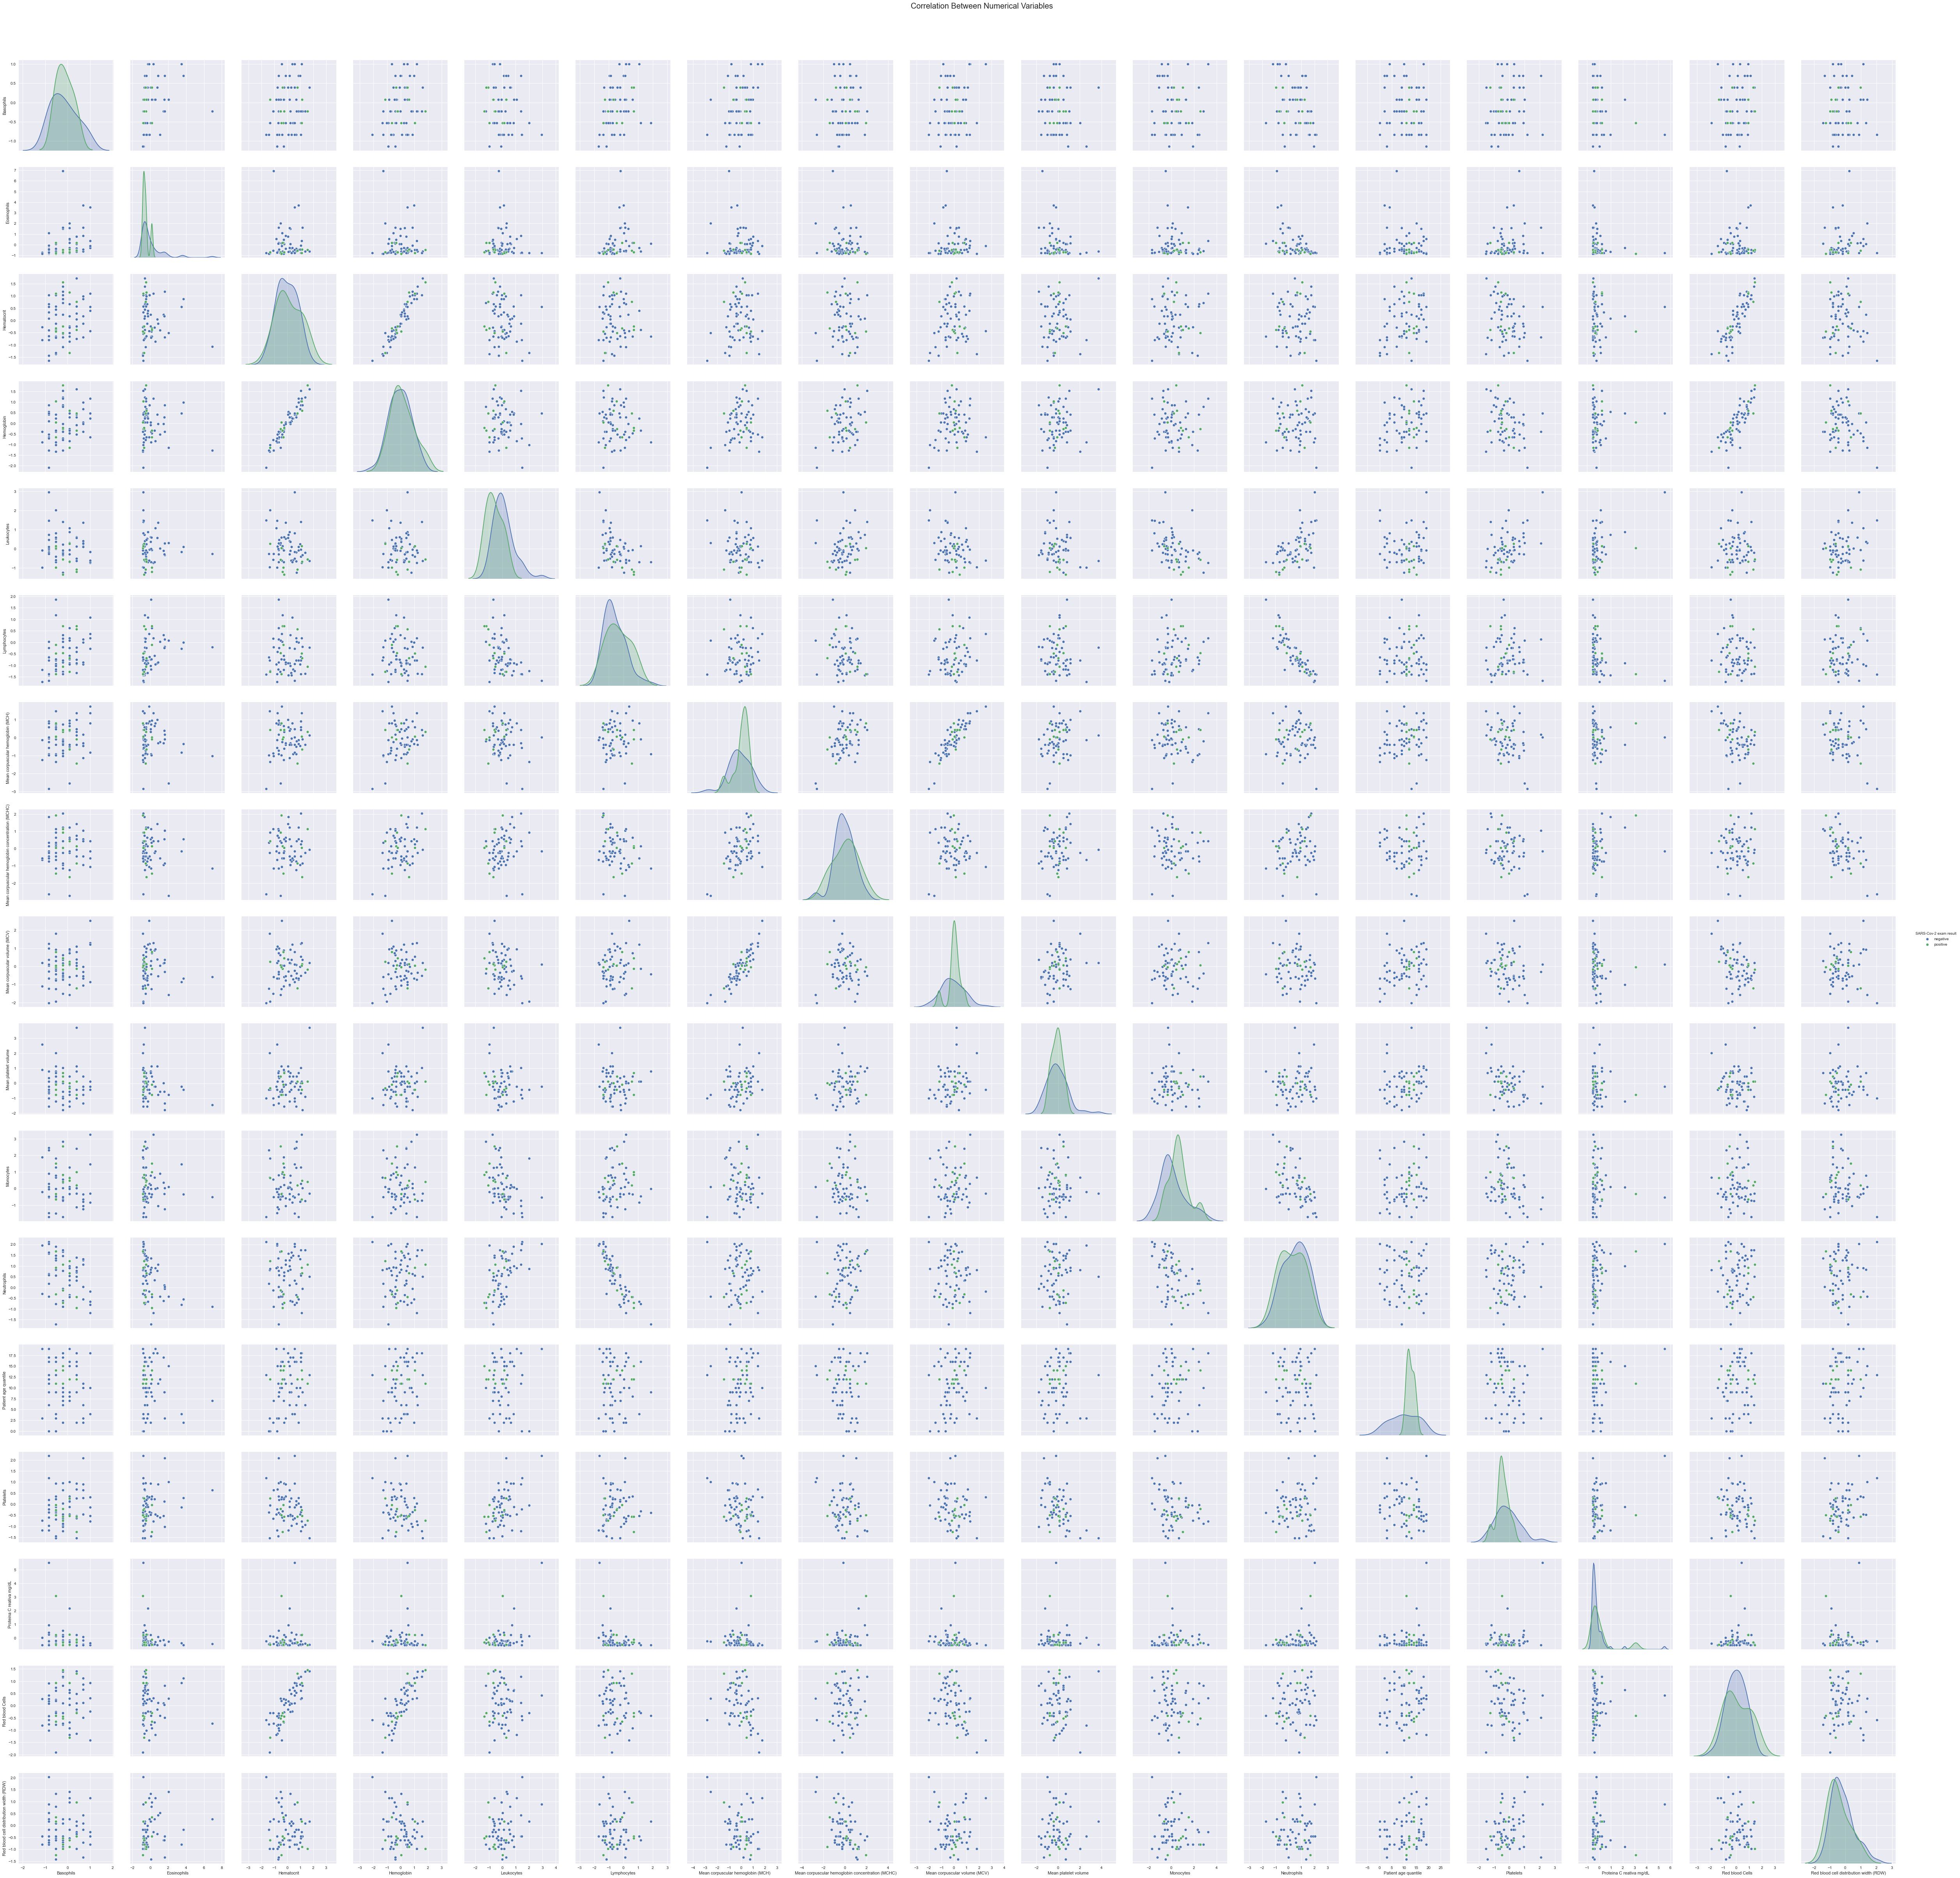

In [21]:
plot_numerical_correlation(df_covid_final_cut[list(numeric_columns) + [class_label]],title = class_label,class_label = class_label)

In [50]:
mask_non_numeric = df_covid_final_cut.dtypes == object
mask_non_numeric = mask_non_numeric[mask_non_numeric]
unique_values = dataframe_utils.show_column_options(df_covid_final_cut[mask_non_numeric.index])

Column Values:
SARS-Cov-2 exam result : ['negative' 'positive']
Respiratory Syncytial Virus : ['not_detected' 'detected']
Influenza A : ['not_detected' 'detected']
Influenza B : ['not_detected' 'detected']
CoronavirusNL63 : ['not_detected' 'detected']
Rhinovirus/Enterovirus : ['detected' 'not_detected']
Coronavirus HKU1 : ['not_detected' 'detected']
Parainfluenza 3 : ['not_detected' 'detected']
Parainfluenza 4 : ['not_detected' 'detected']
Coronavirus229E : ['not_detected' 'detected']
CoronavirusOC43 : ['not_detected' 'detected']
Inf A H1N1 2009 : ['not_detected' 'detected']
Metapneumovirus : ['not_detected' 'detected']


In [51]:
for col in unique_values.keys():
    df_covid_final_cut.loc[df_covid_final_cut[col] == 'detected',col] = 1
    df_covid_final_cut.loc[df_covid_final_cut[col] == 'not_detected',col] = 0

df_covid_final_cut.loc[df_covid_final_cut[class_label] == 'positive',class_label] = 1
df_covid_final_cut.loc[df_covid_final_cut[class_label] == 'negative',class_label] = 0

In [26]:
import math
import sys
from joblib import dump, load

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier

import metrics_utils 
import model_utils

In [52]:
non_float_cols = (df_covid_final_cut.dtypes == np.float).values
for col in df_covid_final_cut.columns:
    if df_covid_final_cut[col].dtypes == np.float:
        continue
    df_covid_final_cut[col] = df_covid_final_cut[col].astype(int)

In [53]:
columns_x = df_covid_final_cut.drop(columns = [class_label,
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)']).columns

column_y = [class_label]

X_train, X_validation, y_train, y_validation = train_test_split(
    df_covid_final_cut[columns_x], df_covid_final_cut[column_y],  test_size=0.20, random_state=42)

In [54]:
scaler = MinMaxScaler()
scaler.fit(df_covid_final_cut[columns_x])
dump(scaler, 'saves/minmax_scaler_no_imputation.bin', compress=True)

X_train_norm = pd.DataFrame(data=scaler.transform(X_train),columns=X_train.columns)
X_validation_norm = pd.DataFrame(data=scaler.transform(X_validation),columns=X_train.columns)

In [55]:
logistic_regression_params = {
    'C' : [0.1,1,10,100],
    'penalty' : ['l2', 'elasticnet'],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
score = 'f1'
best_lr,best_lr_params,best_lr_score = model_utils.find_best_classification_model_with_cross_validation(
    LogisticRegression(random_state=0, class_weight = 'balanced'),
    logistic_regression_params,
    X_train_norm.values,
    y_train.values.ravel(),
    metric = score)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s


--- Ellapsed time: 3.0255727767944336 seconds ---
Best params:  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score (f1) 0.6303263403263404


[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.9s finished


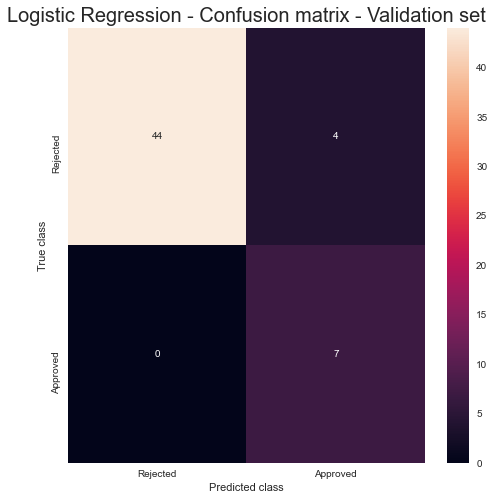

              precision    recall  f1-score   support

    Rejected       1.00      0.92      0.96        48
    Approved       0.64      1.00      0.78         7

    accuracy                           0.93        55
   macro avg       0.82      0.96      0.87        55
weighted avg       0.95      0.93      0.93        55

No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.961


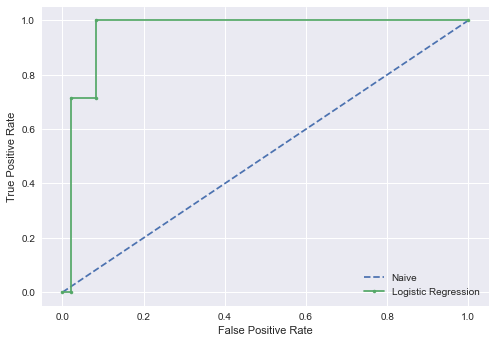

['saves/logistic_regression_no_imputation.bin']

In [56]:
df_result = model_utils.predict(best_lr,X_validation_norm,y_validation);
metrics_utils.evalute_model_performance(best_lr, 'Logistic Regression',X_validation_norm,y_validation,df_result)
dump(best_lr, 'saves/logistic_regression_no_imputation.bin', compress=True)

In [57]:
df_weights = pd.DataFrame(index = columns_x,columns = ['Weights'])
df_weights['Weights'] = best_lr.coef_.ravel()

In [58]:
df_weights['abs_Weights'] = np.abs(df_weights['Weights'])
df_weights.sort_values(by=['abs_Weights'],ascending = False,inplace = True)
df_weights

,Weights,abs_Weights
Eosinophils,-14.753199,14.753199
Leukocytes,-11.311197,11.311197
Influenza B,-7.153165,7.153165
Platelets,-6.924671,6.924671
Inf A H1N1 2009,-6.438804,6.438804
Rhinovirus/Enterovirus,-4.946515,4.946515
CoronavirusNL63,-3.845363,3.845363
Monocytes,3.808290,3.808290
Metapneumovirus,-3.728129,3.728129
Parainfluenza 3,-3.423656,3.423656
